<a href="https://colab.research.google.com/github/snvssk/data298A/blob/saidev/SolarModel_LinearRegression_Fulldataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [5]:
#nsrdb = read_and_preprocess()#nsrdb has nd array all weather data
df = pd.read_csv('/content/all_cities_transformed_combined.csv')

In [6]:
df.head

<bound method NDFrame.head of         Unnamed: 0    Year  Month   Day  Hour  Minute  Temperature  \
0                0  2018.0    1.0   1.0   0.0     0.0         11.2   
1                1  2018.0    1.0   1.0   0.0    30.0         11.2   
2                2  2018.0    1.0   1.0   1.0     0.0         11.1   
3                3  2018.0    1.0   1.0   1.0    30.0         11.0   
4                4  2018.0    1.0   1.0   2.0     0.0         10.9   
...            ...     ...    ...   ...   ...     ...          ...   
946181      946181  2013.0   12.0  31.0  21.0    30.0          6.0   
946182      946182  2013.0   12.0  31.0  22.0     0.0          6.0   
946183      946183  2013.0   12.0  31.0  22.0    30.0          5.0   
946184      946184  2013.0   12.0  31.0  23.0     0.0          4.0   
946185      946185  2013.0   12.0  31.0  23.0    30.0          4.0   

        Cloud_Type  Dew_Point  GHI  Relative_Humidity  Solar_Zenith_Angle  \
0              4.0       10.2  0.0              93.6

In [7]:
df1 = df.drop(columns='Unnamed: 0')

In [8]:
df1

,Year,Month,Day,Hour,Minute,Temperature,Cloud_Type,Dew_Point,GHI,Relative_Humidity,Solar_Zenith_Angle,Surface_Albedo,Pressure,Precipitable_Water,Wind_Direction,Wind_Speed,Location
0,2018.0,1.0,1.0,0.0,0.0,11.2,4.0,10.2,0.0,93.63,165.41,0.100,1024.0,1.700,294.0,0.7,117987.0
1,2018.0,1.0,1.0,0.0,30.0,11.2,4.0,10.2,0.0,93.63,165.11,0.100,1024.0,1.700,307.0,0.7,117987.0
2,2018.0,1.0,1.0,1.0,0.0,11.1,4.0,10.1,0.0,93.38,162.29,0.100,1024.0,1.700,321.0,0.7,117987.0
3,2018.0,1.0,1.0,1.0,30.0,11.0,0.0,10.1,0.0,94.00,157.91,0.100,1024.0,1.800,332.0,0.7,117987.0
4,2018.0,1.0,1.0,2.0,0.0,10.9,0.0,9.9,0.0,93.32,152.72,0.100,1024.0,1.800,344.0,0.7,117987.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
946181,2013.0,12.0,31.0,21.0,30.0,6.0,1.0,0.0,0.0,74.05,142.58,0.113,1020.0,0.950,174.5,0.6,117546.0
946182,2013.0,12.0,31.0,22.0,0.0,6.0,1.0,0.0,0.0,74.40,148.35,0.113,1020.0,0.977,152.1,0.9,117546.0
946183,2013.0,12.0,31.0,22.0,30.0,5.0,0.0,0.0,0.0,79.80,153.89,0.113,1020.0,0.972,152.1,1.1,117546.0
946184,2013.0,12.0,31.0,23.0,0.0,4.0,0.0,0.0,0.0,80.32,158.95,0.113,1020.0,0.968,166.7,1.3,117546.0


In [9]:
null = df1[df1.isna().any(axis=1)]
null

,Year,Month,Day,Hour,Minute,Temperature,Cloud_Type,Dew_Point,GHI,Relative_Humidity,Solar_Zenith_Angle,Surface_Albedo,Pressure,Precipitable_Water,Wind_Direction,Wind_Speed,Location
17520,NaN,117987.0,NaN,NaN,NaN,37.37,-8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,117987.0
17521,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,117987.0
35042,NaN,117987.0,NaN,NaN,NaN,37.37,-8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,117987.0
35043,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,117987.0
52564,NaN,117987.0,NaN,NaN,NaN,37.37,-8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,117987.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
893621,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,117546.0
911142,NaN,117546.0,NaN,NaN,NaN,37.33,-8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,117546.0
911143,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,117546.0
928664,NaN,117546.0,NaN,NaN,NaN,37.33,-8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,117546.0


In [10]:
df1.isnull().sum()

Year                  106
Month                  53
Day                   106
Hour                  106
Minute                106
Temperature            53
Cloud_Type             53
Dew_Point             106
GHI                   106
Relative_Humidity     106
Solar_Zenith_Angle    106
Surface_Albedo        106
Pressure              106
Precipitable_Water    106
Wind_Direction        106
Wind_Speed            106
Location               10
dtype: int64

In [11]:
nsrdb = df1.dropna()
#print(nsrdb)

In [12]:
nsrdb.isnull().sum()

Year                  0
Month                 0
Day                   0
Hour                  0
Minute                0
Temperature           0
Cloud_Type            0
Dew_Point             0
GHI                   0
Relative_Humidity     0
Solar_Zenith_Angle    0
Surface_Albedo        0
Pressure              0
Precipitable_Water    0
Wind_Direction        0
Wind_Speed            0
Location              0
dtype: int64

In [14]:
target = nsrdb['GHI']#keeping only target(ghi) data here
target.head

<bound method NDFrame.head of 0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
946181    0.0
946182    0.0
946183    0.0
946184    0.0
946185    0.0
Name: GHI, Length: 946080, dtype: float64>

In [15]:
target.unique()
type(target)

pandas.core.series.Series

In [16]:
#keeping all feature except ghi in weather variable, # 'Cloud_Type'
weather = nsrdb.drop(['GHI'], axis=1)

In [17]:
weather.head

<bound method NDFrame.head of           Year  Month   Day  Hour  Minute  Temperature  Cloud_Type  Dew_Point  \
0       2018.0    1.0   1.0   0.0     0.0         11.2         4.0       10.2   
1       2018.0    1.0   1.0   0.0    30.0         11.2         4.0       10.2   
2       2018.0    1.0   1.0   1.0     0.0         11.1         4.0       10.1   
3       2018.0    1.0   1.0   1.0    30.0         11.0         0.0       10.1   
4       2018.0    1.0   1.0   2.0     0.0         10.9         0.0        9.9   
...        ...    ...   ...   ...     ...          ...         ...        ...   
946181  2013.0   12.0  31.0  21.0    30.0          6.0         1.0        0.0   
946182  2013.0   12.0  31.0  22.0     0.0          6.0         1.0        0.0   
946183  2013.0   12.0  31.0  22.0    30.0          5.0         0.0        0.0   
946184  2013.0   12.0  31.0  23.0     0.0          4.0         0.0        0.0   
946185  2013.0   12.0  31.0  23.0    30.0          4.0         0.0        0.0  

In [ ]:
#weather['Cloud_Type'] = weather['Cloud_Type'].replace([1.0, 0.0],['Cloudy','Clear'])

In [18]:
#data normalization on weather data
scaler = MinMaxScaler()
scaler.fit(weather)
weather_norm=scaler.transform(weather)

In [19]:
#normalized features in nd arrays
weather_norm

array([[1.        , 0.        , 0.        , ..., 0.81666667, 0.05109489,
        0.37489398],
       [1.        , 0.        , 0.        , ..., 0.85277778, 0.05109489,
        0.37489398],
       [1.        , 0.        , 0.        , ..., 0.89166667, 0.05109489,
        0.37489398],
       ...,
       [0.375     , 1.        , 1.        , ..., 0.4225    , 0.08029197,
        0.25021204],
       [0.375     , 1.        , 1.        , ..., 0.46305556, 0.09489051,
        0.25021204],
       [0.375     , 1.        , 1.        , ..., 0.46305556, 0.09489051,
        0.25021204]])

In [20]:
#converting nd array into pandas data frame for data prep
wq =pd.DataFrame(weather_norm)
type(wq)

pandas.core.frame.DataFrame

In [22]:
wq.head

<bound method NDFrame.head of            0    1    2         3    4         5         6         7   \
0       1.000  0.0  0.0  0.000000  0.0  0.271111  0.363636  0.737374   
1       1.000  0.0  0.0  0.000000  1.0  0.271111  0.363636  0.737374   
2       1.000  0.0  0.0  0.043478  0.0  0.268889  0.363636  0.734007   
3       1.000  0.0  0.0  0.043478  1.0  0.266667  0.000000  0.734007   
4       1.000  0.0  0.0  0.086957  0.0  0.264444  0.000000  0.727273   
...       ...  ...  ...       ...  ...       ...       ...       ...   
946075  0.375  1.0  1.0  0.913043  1.0  0.155556  0.090909  0.393939   
946076  0.375  1.0  1.0  0.956522  0.0  0.155556  0.090909  0.393939   
946077  0.375  1.0  1.0  0.956522  1.0  0.133333  0.000000  0.393939   
946078  0.375  1.0  1.0  1.000000  0.0  0.111111  0.000000  0.393939   
946079  0.375  1.0  1.0  1.000000  1.0  0.111111  0.000000  0.393939   

              8         9         10    11        12        13        14  \
0       0.930534  0.995203  0

In [23]:
#combining normalized features and non-normalized target ghi
frames = [wq, target]
combined_data = pd.concat(frames,axis=1)
type(frames)

list

In [24]:
combined_data.head(20)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,GHI
0,1.0,0.0,0.0,0.000000,0.0,0.271111,0.363636,0.737374,0.930534,0.995203,0.666667,0.8000,0.292500,0.816667,0.051095,0.374894,0.0
1,1.0,0.0,0.0,0.000000,1.0,0.271111,0.363636,0.737374,0.930534,0.993232,0.666667,0.8000,0.292500,0.852778,0.051095,0.374894,0.0
2,1.0,0.0,0.0,0.043478,0.0,0.268889,0.363636,0.734007,0.927808,0.974701,0.666667,0.8000,0.292500,0.891667,0.051095,0.374894,0.0
3,1.0,0.0,0.0,0.043478,1.0,0.266667,0.000000,0.734007,0.934569,0.945919,0.666667,0.8000,0.311203,0.922222,0.051095,0.374894,0.0
4,1.0,0.0,0.0,0.086957,0.0,0.264444,0.000000,0.727273,0.927154,0.911815,0.666667,0.8000,0.311203,0.955556,0.051095,0.374894,0.0
5,1.0,0.0,0.0,0.086957,1.0,0.260000,0.000000,0.727273,0.940676,0.875016,0.666667,0.8000,0.311203,0.977778,0.051095,0.374894,0.0
6,1.0,0.0,0.0,0.130435,0.0,0.257778,0.000000,0.717172,0.931625,0.836838,0.666667,0.8000,0.311203,1.000000,0.051095,0.374894,0.0
7,1.0,0.0,0.0,0.130435,1.0,0.255556,0.000000,0.717172,0.938386,0.797937,0.666667,0.8000,0.311203,0.988889,0.051095,0.374894,0.0
8,1.0,0.0,0.0,0.173913,0.0,0.251111,0.000000,0.710438,0.936096,0.758838,0.666667,0.8000,0.311203,0.977778,0.051095,0.374894,0.0
9,1.0,0.0,0.0,0.173913,1.0,0.251111,0.000000,0.710438,0.936096,0.719740,0.666667,0.8000,0.311203,0.955556,0.051095,0.374894,0.0


In [25]:
combined_data.GHI.unique()

array([   0.,    7.,   46., ..., 1050., 1053., 1047.])

In [26]:
combined_data['GHI'].isnull().values.sum()

106

In [27]:
combined_data.GHI.shape
type(combined_data)

pandas.core.frame.DataFrame

In [28]:
#converting the final combined data into numpy array
final_data = combined_data.to_numpy()
type(final_data)

numpy.ndarray

In [29]:
final_data 

array([[1.        , 0.        , 0.        , ..., 0.05109489, 0.37489398,
        0.        ],
       [1.        , 0.        , 0.        , ..., 0.05109489, 0.37489398,
        0.        ],
       [1.        , 0.        , 0.        , ..., 0.05109489, 0.37489398,
        0.        ],
       ...,
       [       nan,        nan,        nan, ...,        nan,        nan,
        0.        ],
       [       nan,        nan,        nan, ...,        nan,        nan,
        0.        ],
       [       nan,        nan,        nan, ...,        nan,        nan,
        0.        ]])

### weather_norm is normalized data except target(GHI), ghi is target feature with non normalized
### x_train, y_train dataset will use to train the model to get f(X), 
### Y_test is actual ghi which will be used to compare with predicted ghi value, 
### x_test will be used to get the prediction, 
### model error = y_test-predicted


# Modeling

In [30]:
#split data
#x_train, y_train dataset to train the model, x_test will give prediction, y_test is actual and we compare y_test-x_test to get error
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(weather_norm, target, test_size = 0.3, random_state = 5)
print("x_train shape",X_train.shape)
print("x_test shape",X_test.shape)
print("y_train shape",Y_train.shape)
print("y_text shape",Y_test.shape)

x_train shape (662256, 16)
x_test shape (283824, 16)
y_train shape (662256,)
y_text shape (283824,)


In [32]:
# code source:https://medium.com/@haydar_ai/learning-data-science-day-9-linear-regression-on-boston-housing-dataset-cd62a80775ef

lm = LinearRegression()
lm.fit(X_train, Y_train)

LinearRegression()

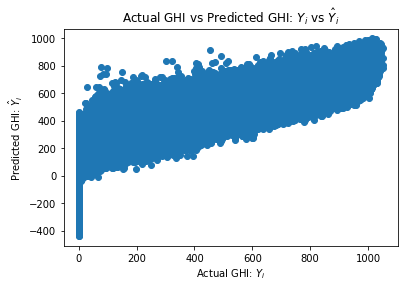

In [33]:
Y_pred = lm.predict(X_test)

plt.scatter(Y_test, Y_pred)
plt.xlabel("Actual GHI: $Y_i$")
plt.ylabel("Predicted GHI: $\hat{Y}_i$")
plt.title("Actual GHI vs Predicted GHI: $Y_i$ vs $\hat{Y}_i$")
plt.show()

## Actual ghi 200 predicting it from 100 to 500, actual is 1000 predicting it as 400 to 1000

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


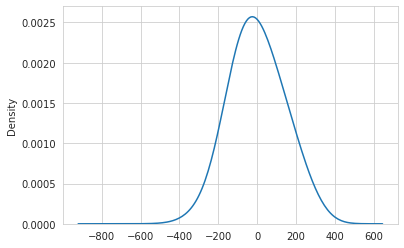

In [34]:
#delta_y is Actual GHI - Predicted GHI
delta_y = Y_test - Y_pred
sns.set_style('whitegrid')
sns.kdeplot(np.array(delta_y), bw=0.5)
plt.show()

## Error distribution
### delta_y is error, plotting the error distribution to see where maximum error points lie, the mean of error points lies around -10, maximum error is -10

In [36]:
#Here for each data point we are getting actual vs predicted
delta_y.head

<bound method NDFrame.head of 74823      86.720170
898866   -114.345106
651488    117.301420
823028     60.079373
64741       9.772376
             ...    
510693   -129.706363
631951    -29.697217
351841    -49.231434
482486    -12.977328
316410    115.093203
Name: GHI, Length: 283824, dtype: float64>

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


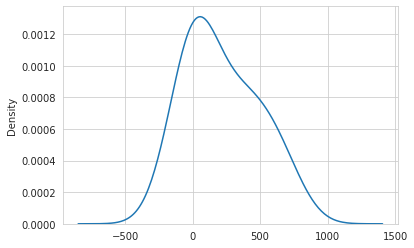

In [37]:
sns.set_style('whitegrid')
sns.kdeplot(np.array(Y_pred), bw=0.5)
plt.show()

## Actual distribution
###  We need to align error distribution and actual distribution for best model by doing feature engineering. 

In [38]:
from sklearn import metrics
print("Model MAE", metrics.mean_absolute_error(Y_test, Y_pred))
print("Model MSE", metrics.mean_squared_error(Y_test, Y_pred))
print("Model RMSE",np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

Model MAE 110.62458396222092
Model MSE 18756.655841554904
Model RMSE 136.95494091691216


In [39]:
from sklearn.metrics import r2_score 
R_square = r2_score(Y_test, Y_pred) 
print('Coefficient of Determination R2', R_square) 

Coefficient of Determination R2 0.7973051774616631


## Test

In [40]:
import pandas as pd
df=pd.read_csv('/content/fostercity_transformed_combined.csv')
fostercity = df.drop(columns='Unnamed: 0')
fostertest_final = fostercity.dropna()


In [44]:
actual = df['GHI']
actual 

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
35037    0.0
35038    0.0
35039    0.0
35040    0.0
35041    0.0
Name: GHI, Length: 35042, dtype: float64

In [41]:
fostertest_final.isnull().sum()

Year                  0
Month                 0
Day                   0
Hour                  0
Minute                0
Temperature           0
Cloud_Type            0
Dew_Point             0
GHI                   0
Relative_Humidity     0
Solar_Zenith_Angle    0
Surface_Albedo        0
Pressure              0
Precipitable_Water    0
Wind_Direction        0
Wind_Speed            0
Location              0
dtype: int64

In [42]:
input_data= fostertest_final.drop(columns='GHI')
from sklearn.preprocessing import StandardScaler
#Normalize the dataset
sc = StandardScaler()
input_nor = sc.fit_transform(input_data)

In [43]:
y_pred1=lm.predict(input_nor)

In [48]:
predicted =pd.DataFrame(y_pred1)
type(predicted)

pandas.core.frame.DataFrame

In [52]:
actual

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
35037    0.0
35038    0.0
35039    0.0
35040    0.0
35041    0.0
Name: GHI, Length: 35042, dtype: float64

In [51]:
predicted

,0
0,-929.817359
1,-954.585930
2,-891.780937
3,-804.502096
4,-704.474164
...,...
35035,-1114.616058
35036,-1359.758400
35037,-1469.230718
35038,-1603.657244


In [53]:
"""plt.scatter(actual, predicted)
plt.xlabel("Actual GHI: $Y_i$")
plt.ylabel("Predicted GHI: $\hat{Y}_i$")
plt.title("Actual GHI vs Predicted GHI: $Y_i$ vs $\hat{Y}_i$")
plt.show()"""

'plt.scatter(actual, predicted)\nplt.xlabel("Actual GHI: $Y_i$")\nplt.ylabel("Predicted GHI: $\\hat{Y}_i$")\nplt.title("Actual GHI vs Predicted GHI: $Y_i$ vs $\\hat{Y}_i$")\nplt.show()'